## 카테고리별 목포, 통영, 군산시 판매 실적

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib.ticker import MaxNLocator
import random

In [3]:
cj=pd.read_csv('cj_olive')

In [4]:
cj

,DL_YM,DL_GD_LCLS_NM,DL_GD_LCLS_CD,DL_GD_MCLS_NM,DL_GD_MCLS_CD,CTPV_NM,CTPV_CD,CTGG_NM,CTGG_CD,EMD_NM,LGDNG_CD,INVC_CONT
0,202101,가구/인테리어,10,DIY자재/용품,1010,경상남도,48,통영시,48220,중앙동,4822010500,4
1,202101,가구/인테리어,10,수납가구,1013,전라북도,45,군산시,45130,동흥남동,4513013200,3
2,202101,가구/인테리어,10,아웃도어가구,1014,경상남도,48,통영시,48220,동호동,4822010800,3
3,202101,가구/인테리어,10,인테리어소품,1015,전라북도,45,군산시,45130,임피면 읍내리,4513033021,15
4,202101,가구/인테리어,10,침구단품,1017,전라북도,45,군산시,45130,경암동,4513013600,6
...,...,...,...,...,...,...,...,...,...,...,...,...
33114,202103,화장품/미용,19,클렌징,1918,전라북도,45,군산시,45130,오식도동,4513014700,21
33115,202103,화장품/미용,19,클렌징,1918,전라북도,45,군산시,45130,나포면 나포리,4513038021,5
33116,202103,화장품/미용,19,향수,1919,전라북도,45,군산시,45130,송풍동,4513010900,4
33117,202103,화장품/미용,19,헤어스타일링,1920,경상남도,48,통영시,48220,산양읍 미남리,4822025023,6


In [5]:
list(cj)

['DL_YM',
 'DL_GD_LCLS_NM',
 'DL_GD_LCLS_CD',
 'DL_GD_MCLS_NM',
 'DL_GD_MCLS_CD',
 'CTPV_NM',
 'CTPV_CD',
 'CTGG_NM',
 'CTGG_CD',
 'EMD_NM',
 'LGDNG_CD',
 'INVC_CONT']

In [6]:
cj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33119 entries, 0 to 33118
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   DL_YM          33119 non-null  int64 
 1   DL_GD_LCLS_NM  33119 non-null  object
 2   DL_GD_LCLS_CD  33119 non-null  int64 
 3   DL_GD_MCLS_NM  33119 non-null  object
 4   DL_GD_MCLS_CD  33119 non-null  int64 
 5   CTPV_NM        33119 non-null  object
 6   CTPV_CD        33119 non-null  int64 
 7   CTGG_NM        33119 non-null  object
 8   CTGG_CD        33119 non-null  int64 
 9   EMD_NM         33119 non-null  object
 10  LGDNG_CD       33119 non-null  int64 
 11  INVC_CONT      33119 non-null  int64 
dtypes: int64(7), object(5)
memory usage: 3.0+ MB


In [7]:
cj.describe()

,DL_YM,DL_GD_LCLS_CD,DL_GD_MCLS_CD,CTPV_CD,CTGG_CD,LGDNG_CD,INVC_CONT
count,33119.000000,33119.000000,33119.000000,33119.000000,33119.000000,3.311900e+04,33119.000000
mean,202102.015943,14.644222,1486.104532,46.138561,46292.593677,4.629278e+09,106.837586
std,0.822629,2.730927,273.680208,1.309370,1349.871560,1.349886e+08,341.748325
min,202101.000000,10.000000,1010.000000,45.000000,45130.000000,4.513010e+09,3.000000
25%,202101.000000,13.000000,1310.000000,45.000000,45130.000000,4.513014e+09,6.000000
50%,202102.000000,14.000000,1499.000000,46.000000,46110.000000,4.611010e+09,17.000000
75%,202103.000000,17.000000,1714.000000,48.000000,48220.000000,4.822011e+09,61.000000
max,202103.000000,19.000000,1999.000000,48.000000,48220.000000,4.822037e+09,6313.000000


In [8]:
category_range=set(cj['DL_GD_LCLS_NM'])
print(category_range, len(category_range))

{'출산/육아', '화장품/미용', '패션의류', '디지털/가전', '패션잡화', '생활/건강', '여행/문화', '가구/인테리어', '식품', '스포츠/레저'} 10


In [9]:
cj['구']=cj['CTGG_NM']
cj['동']=cj['EMD_NM']
cj['카테고리']=cj['DL_GD_LCLS_NM']
cj['월']=cj['DL_YM']
cj['송장개수']=cj['INVC_CONT']

In [10]:
tongyoung_data=cj[cj['구']=='통영시']
tongyoung_data.tail(10)


,DL_YM,DL_GD_LCLS_NM,DL_GD_LCLS_CD,DL_GD_MCLS_NM,DL_GD_MCLS_CD,CTPV_NM,CTPV_CD,CTGG_NM,CTGG_CD,EMD_NM,LGDNG_CD,INVC_CONT,구,동,카테고리,월,송장개수
33101,202103,패션잡화,18,지갑,1822,경상남도,48,통영시,48220,무전동,4822011100,25,통영시,무전동,패션잡화,202103,25
33102,202103,패션잡화,18,기타패션잡화,1899,경상남도,48,통영시,48220,광도면 죽림리,4822034024,114,통영시,광도면 죽림리,패션잡화,202103,114
33103,202103,화장품/미용,19,남성화장품,1910,경상남도,48,통영시,48220,광도면 황리,4822034026,36,통영시,광도면 황리,화장품/미용,202103,36
33105,202103,화장품/미용,19,바디케어,1912,경상남도,48,통영시,48220,광도면 덕포리,4822034021,5,통영시,광도면 덕포리,화장품/미용,202103,5
33108,202103,화장품/미용,19,색조메이크업,1915,경상남도,48,통영시,48220,도천동,4822010100,64,통영시,도천동,화장품/미용,202103,64
33109,202103,화장품/미용,19,색조메이크업,1915,경상남도,48,통영시,48220,산양읍 영운리,4822025021,10,통영시,산양읍 영운리,화장품/미용,202103,10
33111,202103,화장품/미용,19,선케어,1916,경상남도,48,통영시,48220,항남동,4822010400,13,통영시,항남동,화장품/미용,202103,13
33112,202103,화장품/미용,19,스킨케어,1917,경상남도,48,통영시,48220,평림동,4822011200,13,통영시,평림동,화장품/미용,202103,13
33113,202103,화장품/미용,19,스킨케어,1917,경상남도,48,통영시,48220,욕지면 동항리,4822035021,33,통영시,욕지면 동항리,화장품/미용,202103,33
33117,202103,화장품/미용,19,헤어스타일링,1920,경상남도,48,통영시,48220,산양읍 미남리,4822025023,6,통영시,산양읍 미남리,화장품/미용,202103,6


In [11]:
print(len(tongyoung_data))

10334


In [12]:
groupdata=tongyoung_data.groupby('카테고리')
group_by_category=groupdata['카테고리']
category_count=group_by_category.count()
sorted_category_count=category_count.sort_values(ascending=False)
sorted_category_count

카테고리
생활/건강      1771
디지털/가전     1485
식품         1430
화장품/미용     1161
패션잡화       1021
가구/인테리어     897
패션의류        880
스포츠/레저      877
출산/육아       690
여행/문화       122
Name: 카테고리, dtype: int64

In [13]:
import matplotlib.pyplot as plt

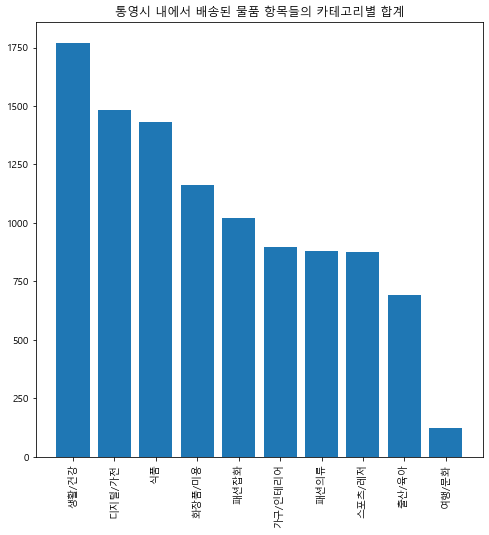

In [14]:
plt.rcParams['font.family']="Malgun Gothic"

plt.figure(figsize=(8,8))
plt.bar(sorted_category_count.index, sorted_category_count)
plt.title('통영시 내에서 배송된 물품 항목들의 카테고리별 합계')
plt.xticks(rotation=90)
plt.show()

In [15]:
gunsan_data=cj[cj['구']=='군산시']
gunsan_data.tail(10)


,DL_YM,DL_GD_LCLS_NM,DL_GD_LCLS_CD,DL_GD_MCLS_NM,DL_GD_MCLS_CD,CTPV_NM,CTPV_CD,CTGG_NM,CTGG_CD,EMD_NM,LGDNG_CD,INVC_CONT,구,동,카테고리,월,송장개수
33096,202103,패션잡화,18,모자,1811,전라북도,45,군산시,45130,나운동,4513014400,311,군산시,나운동,패션잡화,202103,311
33098,202103,패션잡화,18,선글라스/안경테,1813,전라북도,45,군산시,45130,개정동,4513013900,5,군산시,개정동,패션잡화,202103,5
33100,202103,패션잡화,18,주얼리,1821,전라북도,45,군산시,45130,미룡동,4513014500,206,군산시,미룡동,패션잡화,202103,206
33104,202103,화장품/미용,19,바디케어,1912,전라북도,45,군산시,45130,삼학동,4513011100,96,군산시,삼학동,화장품/미용,202103,96
33106,202103,화장품/미용,19,뷰티소품,1914,전라북도,45,군산시,45130,선양동,4513011200,16,군산시,선양동,화장품/미용,202103,16
33107,202103,화장품/미용,19,뷰티소품,1914,전라북도,45,군산시,45130,성산면 창오리,4513037027,4,군산시,성산면 창오리,화장품/미용,202103,4
33110,202103,화장품/미용,19,선케어,1916,전라북도,45,군산시,45130,신풍동,4513010800,8,군산시,신풍동,화장품/미용,202103,8
33114,202103,화장품/미용,19,클렌징,1918,전라북도,45,군산시,45130,오식도동,4513014700,21,군산시,오식도동,화장품/미용,202103,21
33115,202103,화장품/미용,19,클렌징,1918,전라북도,45,군산시,45130,나포면 나포리,4513038021,5,군산시,나포면 나포리,화장품/미용,202103,5
33116,202103,화장품/미용,19,향수,1919,전라북도,45,군산시,45130,송풍동,4513010900,4,군산시,송풍동,화장품/미용,202103,4


In [16]:
gunsan_groupdata=gunsan_data.groupby('카테고리')
gunsan_group_by_category=gunsan_groupdata['카테고리']
gunsan_category_count=gunsan_group_by_category.count()
gunsan_sorted_category_count=gunsan_category_count.sort_values(ascending=False)
gunsan_sorted_category_count

카테고리
생활/건강      2777
디지털/가전     2392
식품         2106
화장품/미용     1874
패션잡화       1623
패션의류       1390
가구/인테리어    1370
스포츠/레저     1290
출산/육아      1071
여행/문화       186
Name: 카테고리, dtype: int64

In [17]:
gunsan_data.groupby('카테고리')

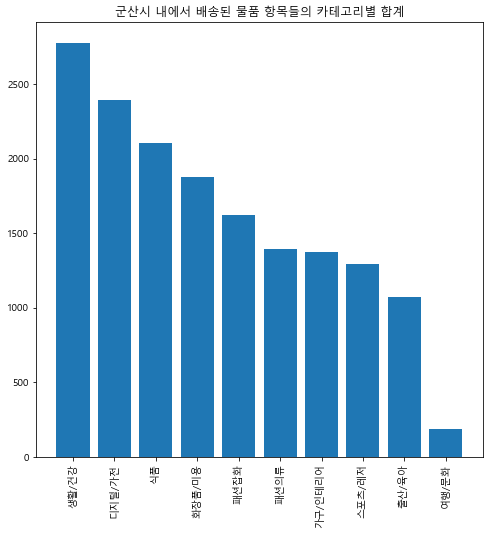

In [18]:
plt.rcParams['font.family']="Malgun Gothic"

plt.figure(figsize=(8,8))
plt.bar(gunsan_sorted_category_count.index, gunsan_sorted_category_count)
plt.title('군산시 내에서 배송된 물품 항목들의 카테고리별 합계')
plt.xticks(rotation=90)
plt.show()

In [19]:
mokpo_data=cj[cj['구']=='목포시']
gunsan_data.tail(10)


,DL_YM,DL_GD_LCLS_NM,DL_GD_LCLS_CD,DL_GD_MCLS_NM,DL_GD_MCLS_CD,CTPV_NM,CTPV_CD,CTGG_NM,CTGG_CD,EMD_NM,LGDNG_CD,INVC_CONT,구,동,카테고리,월,송장개수
33096,202103,패션잡화,18,모자,1811,전라북도,45,군산시,45130,나운동,4513014400,311,군산시,나운동,패션잡화,202103,311
33098,202103,패션잡화,18,선글라스/안경테,1813,전라북도,45,군산시,45130,개정동,4513013900,5,군산시,개정동,패션잡화,202103,5
33100,202103,패션잡화,18,주얼리,1821,전라북도,45,군산시,45130,미룡동,4513014500,206,군산시,미룡동,패션잡화,202103,206
33104,202103,화장품/미용,19,바디케어,1912,전라북도,45,군산시,45130,삼학동,4513011100,96,군산시,삼학동,화장품/미용,202103,96
33106,202103,화장품/미용,19,뷰티소품,1914,전라북도,45,군산시,45130,선양동,4513011200,16,군산시,선양동,화장품/미용,202103,16
33107,202103,화장품/미용,19,뷰티소품,1914,전라북도,45,군산시,45130,성산면 창오리,4513037027,4,군산시,성산면 창오리,화장품/미용,202103,4
33110,202103,화장품/미용,19,선케어,1916,전라북도,45,군산시,45130,신풍동,4513010800,8,군산시,신풍동,화장품/미용,202103,8
33114,202103,화장품/미용,19,클렌징,1918,전라북도,45,군산시,45130,오식도동,4513014700,21,군산시,오식도동,화장품/미용,202103,21
33115,202103,화장품/미용,19,클렌징,1918,전라북도,45,군산시,45130,나포면 나포리,4513038021,5,군산시,나포면 나포리,화장품/미용,202103,5
33116,202103,화장품/미용,19,향수,1919,전라북도,45,군산시,45130,송풍동,4513010900,4,군산시,송풍동,화장품/미용,202103,4


In [20]:
mokpo_groupdata=mokpo_data.groupby('카테고리')
mokpo_group_by_category=mokpo_groupdata['카테고리']
mokpo_category_count=mokpo_group_by_category.count()
mokpo_sorted_category_count=mokpo_category_count.sort_values(ascending=False)
mokpo_sorted_category_count

카테고리
생활/건강      1086
디지털/가전     1070
식품          813
화장품/미용      731
패션잡화        706
스포츠/레저      644
가구/인테리어     590
패션의류        528
출산/육아       467
여행/문화        71
Name: 카테고리, dtype: int64

In [21]:
mokpo_data.groupby('카테고리')

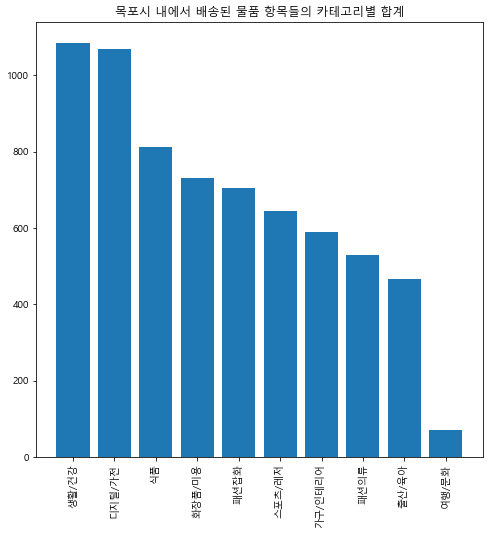

In [22]:
plt.rcParams['font.family']="Malgun Gothic"

plt.figure(figsize=(8,8))
plt.bar(mokpo_sorted_category_count.index, mokpo_sorted_category_count)
plt.title('목포시 내에서 배송된 물품 항목들의 카테고리별 합계')
plt.xticks(rotation=90)
plt.show()

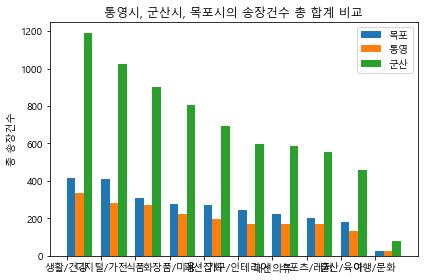

In [34]:

labels = sorted_category_count.index
tongyoung_result = sorted_category_count
gunsan_result = gunsan_sorted_category_count
mokpo_result = mokpo_sorted_category_count



x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x + width/2, mokpo_result*(24/63), width, label='목포')
rects2 = ax.bar(x + 3*(width/2), tongyoung_result*(12/63), width, label='통영')
rects3 = ax.bar(x + 5*(width/2), gunsan_result*(27/63), width, label='군산')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('총 송장건수')
ax.set_title('통영시, 군산시, 목포시의 송장건수 총 합계 비교')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
fig.tight_layout()


plt.show()

## 월별 송장 개수 추이

In [24]:
#tongyoung_month_groupdata=tongyoung_data.groupby('DL_YM')
#tongyoung_month_group_by_category=tongyoung_month_groupdata['EMD_NM']
#tongyoung_month_count=tongyoung_month_group_by_category.count()
#tongyoung_month_sorted_category_count=tongyoung_month_count.sort_values(ascending=False)
#tongyoung_month_sorted_category_count

In [25]:
cj.isnull().sum()

DL_YM            0
DL_GD_LCLS_NM    0
DL_GD_LCLS_CD    0
DL_GD_MCLS_NM    0
DL_GD_MCLS_CD    0
CTPV_NM          0
CTPV_CD          0
CTGG_NM          0
CTGG_CD          0
EMD_NM           0
LGDNG_CD         0
INVC_CONT        0
구                0
동                0
카테고리             0
월                0
송장개수             0
dtype: int64

In [26]:
cj.groupby('월').sum()['INVC_CONT']

월
202101    1175887
202102    1051189
202103    1311278
Name: INVC_CONT, dtype: int64

In [27]:
# 월별, 각 구가 주문한 물건들을 카테고리별로 정리함
pd.set_option('display.max_rows',100000)
cj.groupby(["월", "카테고리","구"]).sum()[["INVC_CONT"]]

INVC_CONT
월      카테고리    구             
202101 가구/인테리어 군산시      16606
               목포시      15455
               통영시       7525
       디지털/가전  군산시      29140
               목포시      26579
               통영시      12111
       생활/건강   군산시      92664
               목포시      84684
               통영시      42437
       스포츠/레저  군산시       9096
               목포시       8905
               통영시       5270
       식품      군산시     169239
               목포시     151309
               통영시      80213
       여행/문화   군산시      22887
               목포시      18426
               통영시       9643
       출산/육아   군산시      19591
               목포시      17608
               통영시       8333
       패션의류    군산시      57416
               목포시      58497
               통영시      27556
       패션잡화    군산시      23862
               목포시      23502
               통영시      10610
       화장품/미용  군산시      52825
               목포시      49806
               통영시      24092
202102 가구/인테리어 군산시      14360
               목포시      14112
               통영시       6637
       디지털/가전  군산시      27976
               목포시      25447
               통영시      11448
       생활/건강   군산시      81948
               목포시      76516
               통영시      37447
       스포츠/레저  군산시       8204
               목포시       7949
               통영시       4283
       식품      군산시     144776
               목포시     133577
               통영시      66905
       여행/문화   군산시      17748
               목포시      14877
               통영시       7736
       출산/육아   군산시      18763
               목포시      18065
               통영시       8407
       패션의류    군산시      54989
               목포시      55678
               통영시      24776
       패션잡화    군산시      21427
               목포시      21440
               통영시       9744
       화장품/미용  군산시      48134
               목포시      46223
               통영시      21597
202103 가구/인테리어 군산시      18163
               목포시      16611
               통영시       8059
       디지털/가전  군산시      32327
               목포시      28746
               통영시      12814
       생활/건강   군산시     104402
               목포시      93599
               통영시      46711
       스포츠/레저  군산시      12493
               목포시      12223
               통영시       6190
       식품      군산시     160085
               목포시     142568
               통영시      74089
       여행/문화   군산시      22932
               목포시      20324
               통영시      10043
       출산/육아   군산시      24702
               목포시      22490
               통영시      10795
       패션의류    군산시      92063
               목포시      88822
               통영시      39041
       패션잡화    군산시      30192
               목포시      29179
               통영시      13424
       화장품/미용  군산시      58349
               목포시      53862
               통영시      25980

In [28]:
pd.pivot_table(cj, index='카테고리', columns='월', values=['INVC_CONT'], aggfunc='sum')

INVC_CONT                
월          202101  202102  202103
카테고리                             
가구/인테리어     39586   35109   42833
디지털/가전      67830   64871   73887
생활/건강      219785  195911  244712
스포츠/레저      23271   20436   30906
식품         400761  345258  376742
여행/문화       50956   40361   53299
출산/육아       45532   45235   57987
패션의류       143469  135443  219926
패션잡화        57974   52611   72795
화장품/미용     126723  115954  138191

In [29]:
graph_data = pd.pivot_table(cj, index='월', columns='카테고리', values='INVC_CONT', aggfunc='sum')
graph_data.head()

카테고리,가구/인테리어,디지털/가전,생활/건강,스포츠/레저,식품,여행/문화,출산/육아,패션의류,패션잡화,화장품/미용
월,,,,,,,,,,
202101,39586,67830,219785,23271,400761,50956,45532,143469,57974,126723
202102,35109,64871,195911,20436,345258,40361,45235,135443,52611,115954
202103,42833,73887,244712,30906,376742,53299,57987,219926,72795,138191


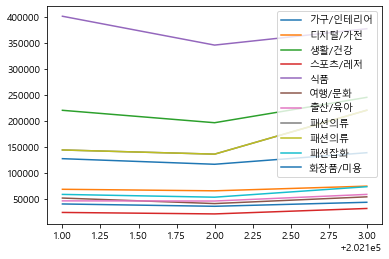

In [30]:
%matplotlib inline
plt.plot(list(graph_data.index), graph_data["가구/인테리어"], label='가구/인테리어')
plt.plot(list(graph_data.index), graph_data["디지털/가전"], label='디지털/가전')
plt.plot(list(graph_data.index), graph_data["생활/건강"], label='생활/건강')
plt.plot(list(graph_data.index), graph_data["스포츠/레저"], label='스포츠/레저')
plt.plot(list(graph_data.index), graph_data["식품"], label='식품')
plt.plot(list(graph_data.index), graph_data["여행/문화"], label='여행/문화')
plt.plot(list(graph_data.index), graph_data["출산/육아"], label='출산/육아')
plt.plot(list(graph_data.index), graph_data["패션의류"], label='패션의류')
plt.plot(list(graph_data.index), graph_data["패션의류"], label='패션의류')
plt.plot(list(graph_data.index), graph_data["패션잡화"], label='패션잡화')
plt.plot(list(graph_data.index), graph_data["화장품/미용"], label='화장품/미용')

plt.legend()

## 동별 송장 카테고리 합계수 

In [31]:
pd.pivot_table(cj, index='EMD_NM', columns='카테고리', values='INVC_CONT', aggfunc='sum', fill_value=0)

카테고리,가구/인테리어,디지털/가전,생활/건강,스포츠/레저,식품,여행/문화,출산/육아,패션의류,패션잡화,화장품/미용
EMD_NM,,,,,,,,,,
개사동,368,631,1950,196,3291,389,298,1067,387,836
개정동,273,616,1964,215,3316,433,296,1279,469,1005
개정면 아동리,126,249,979,59,1660,174,110,604,233,413
개정면 아산리,0,0,0,0,13,0,0,0,0,0
개정면 운회리,29,68,247,10,557,32,21,174,58,85
개정면 통사리,0,0,0,0,0,0,0,0,0,3
경동1가,0,0,0,0,3,0,0,0,0,0
경암동,286,652,1709,183,2875,289,246,1156,403,925
경장동,1095,1971,6240,1047,10225,1403,1291,4320,1612,3534


In [32]:
cj.groupby(["동"]).sum()[["INVC_CONT"]]


,INVC_CONT
동,
개사동,9413
개정동,9866
개정면 아동리,4607
개정면 아산리,13
개정면 운회리,1281
개정면 통사리,3
경동1가,3
경암동,8724
경장동,32738
